In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geodatasets import get_path

In [2]:
#load the dataset
df= pd.read_csv('amazon_sales_cleaned.csv', encoding='utf-8')
df

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier_status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Promotion,Day,Month,Year,Order_total
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship,True,30,4,2022,406.0
1,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,Amazon,True,30,4,2022,329.0
2,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,Amazon,False,30,4,2022,574.0
3,2022-04-30,Shipped,Amazon,Expedited,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,Amazon,True,30,4,2022,824.0
4,2022-04-30,Shipped,Amazon,Expedited,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,Amazon,True,30,4,2022,653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116011,2022-05-31,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,517.0,HYDERABAD,TELANGANA,False,Amazon,False,31,5,2022,517.0
116012,2022-05-31,Shipped,Amazon,Expedited,Set,M,Shipped,1,999.0,GURUGRAM,HARYANA,False,Amazon,True,31,5,2022,999.0
116013,2022-05-31,Shipped,Amazon,Expedited,Western Dress,XXL,Shipped,1,690.0,HYDERABAD,TELANGANA,False,Amazon,False,31,5,2022,690.0
116014,2022-05-31,Shipped,Amazon,Expedited,Set,XS,Shipped,1,1199.0,Halol,Gujarat,False,Amazon,True,31,5,2022,1199.0


In [3]:
df['Year'].unique()

array([2022])

# objectives
 - pie chart -fulfilled by 
 - pie chart b2b
 - state distrubtion (region)
 - courier status - distribution
 - Sales distrubution over time/month
 - Promotion impact on sales
 - pie category bar chart bar chart
 

In [4]:
df['fulfilled-by'].unique()

array(['Easy Ship', 'Amazon'], dtype=object)

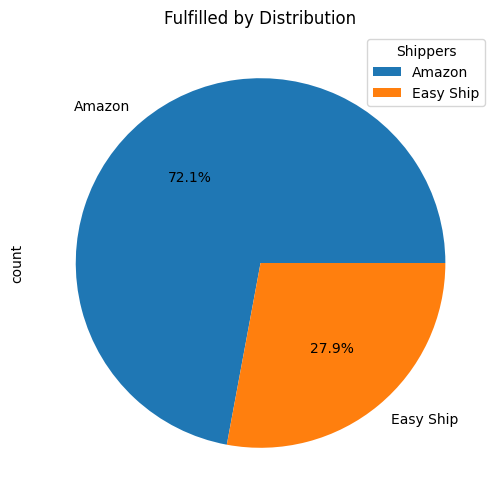

In [5]:
# pie chart -fulfilled by 
data=df['fulfilled-by'].value_counts()
data.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Fulfilled by Distribution')
plt.legend(title='Shippers', loc='upper right')
plt.show()

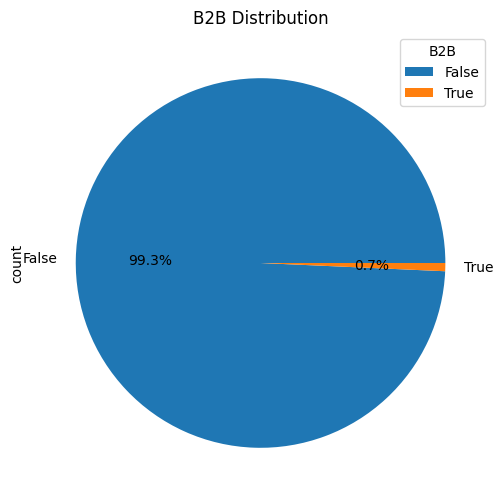

In [6]:
#  - pie chart b2b
data=df['B2B'].value_counts()
data.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('B2B Distribution')
plt.legend(title='B2B', loc='upper right')
plt.show()

In [7]:
# total sales b2b comparison
b2b_sales = df.groupby('B2B')['Order_total'].sum()
b2b_sales



B2B
False    75399695.0
True       617180.0
Name: Order_total, dtype: float64

<Axes: ylabel='Order_total'>

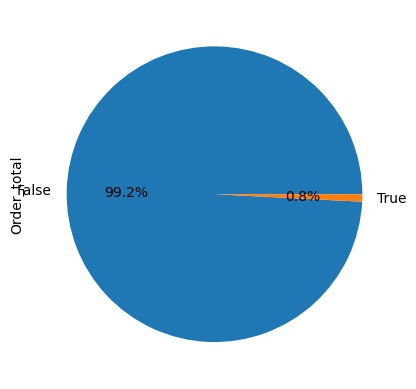

In [8]:
b2b_sales.plot(kind='pie',autopct='%1.1f%%', color=['skyblue', 'lightgreen'])

In [9]:
df.head()

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier_status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Promotion,Day,Month,Year,Order_total
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship,True,30,4,2022,406.0
1,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,Amazon,True,30,4,2022,329.0
2,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,Amazon,False,30,4,2022,574.0
3,2022-04-30,Shipped,Amazon,Expedited,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,Amazon,True,30,4,2022,824.0
4,2022-04-30,Shipped,Amazon,Expedited,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,Amazon,True,30,4,2022,653.0


In [10]:
# state distrubtion (region)
state_data=df['ship-state'].value_counts()

In [11]:
state_data=df.groupby('ship-state')[['Order_total','Qty']].sum()
state_data

,Order_total,Qty
ship-state,,
ANDAMAN & NICOBAR,149939.0,226
ANDHRA PRADESH,3109687.0,4819
AR,493.0,1
ARUNACHAL PRADESH,92535.0,130
ASSAM,978279.0,1483
...,...,...
goa,2467.0,5
orissa,597.0,1
punjab,8622.0,13


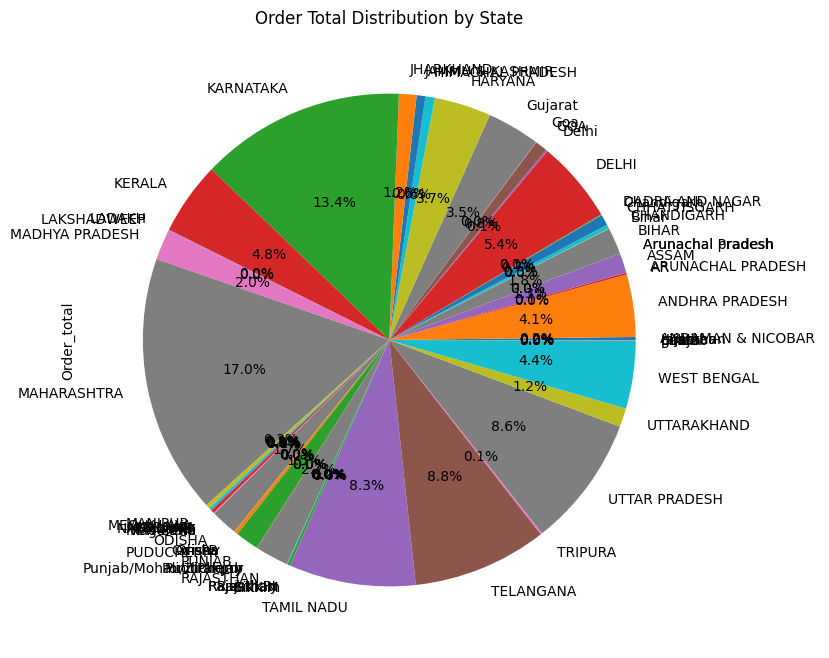

In [12]:
#pie chart - order total distribution

state_data['Order_total'].plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Order Total Distribution by State')
# plt.legend(title='States', loc='upper right')
plt.show()


In [13]:
state_data.sort_values(by='Order_total', ascending=False, inplace=True)
#add some percentage column
state_data['Percentage']=(state_data['Order_total']/state_data['Order_total'].sum())*100
state_data['Percentage'] = state_data['Percentage'].astype('float').round(2)
state_data.head(10)

,Order_total,Qty,Percentage
ship-state,,,
MAHARASHTRA,12937351.0,20328,17.02
KARNATAKA,10222900.0,15901,13.45
TELANGANA,6705327.0,10253,8.82
UTTAR PRADESH,6555661.0,9499,8.62
TAMIL NADU,6327065.0,10412,8.32
DELHI,4092973.0,6156,5.38
KERALA,3641375.0,5813,4.79
WEST BENGAL,3378962.0,5318,4.45
ANDHRA PRADESH,3109687.0,4819,4.09


In [15]:
print(df['ship-state'].unique())


['KARNATAKA' 'MAHARASHTRA' 'TAMIL NADU' 'UTTAR PRADESH' 'CHANDIGARH'
 'TELANGANA' 'ANDHRA PRADESH' 'RAJASTHAN' 'DELHI' 'HARYANA' 'ASSAM'
 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'KERALA' 'MADHYA PRADESH'
 'WEST BENGAL' 'NAGALAND' 'Gujarat' 'UTTARAKHAND' 'BIHAR'
 'JAMMU & KASHMIR' 'PUNJAB' 'HIMACHAL PRADESH' 'ARUNACHAL PRADESH'
 'MANIPUR' 'Goa' 'MEGHALAYA' 'PUDUCHERRY' 'GOA' 'TRIPURA' 'LADAKH'
 'DADRA AND NAGAR' 'SIKKIM' 'Delhi' 'ANDAMAN & NICOBAR ' 'Punjab'
 'Rajshthan' 'Manipur' 'rajasthan' 'Odisha' 'NL' 'Bihar' 'MIZORAM'
 'punjab' 'New Delhi' 'Rajasthan' 'Punjab/Mohali/Zirakpur' 'Puducherry'
 'delhi' 'RJ' 'Chandigarh' 'orissa' 'LAKSHADWEEP' 'goa' 'PB'
 'Arunachal Pradesh' 'AR' 'Pondicherry' 'Sikkim' 'Arunachal pradesh'
 'Nagaland' 'bihar' 'Mizoram' 'rajsthan' 'Orissa' 'Rajsthan']


In [16]:
import json
coordinates_dict=open('coordinates.json', 'r').read()
coordinates=json.loads(coordinates_dict)
coordinates

{'KARNATAKA': {'x': 77.5946, 'y': 12.9716},
 'MAHARASHTRA': {'x': 72.8777, 'y': 19.076},
 'TAMIL NADU': {'x': 80.2707, 'y': 13.0827},
 'UTTAR PRADESH': {'x': 80.9462, 'y': 26.8467},
 'CHANDIGARH': {'x': 76.7794, 'y': 30.7333},
 'TELANGANA': {'x': 78.4867, 'y': 17.385},
 'ANDHRA PRADESH': {'x': 80.516, 'y': 16.5147},
 'RAJASTHAN': {'x': 75.7873, 'y': 26.9124},
 'DELHI': {'x': 77.209, 'y': 28.6139},
 'HARYANA': {'x': 76.7794, 'y': 30.7333},
 'ASSAM': {'x': 91.7898, 'y': 26.1408},
 'JHARKHAND': {'x': 85.3096, 'y': 23.3441},
 'CHHATTISGARH': {'x': 81.6296, 'y': 21.2514},
 'ODISHA': {'x': 85.8245, 'y': 20.2961},
 'KERALA': {'x': 76.9366, 'y': 8.5241},
 'MADHYA PRADESH': {'x': 77.4126, 'y': 23.2599},
 'WEST BENGAL': {'x': 88.3639, 'y': 22.5726},
 'NAGALAND': {'x': 94.1086, 'y': 25.6751},
 'Gujarat': {'x': 72.6369, 'y': 23.2156},
 'UTTARAKHAND': {'x': 78.0322, 'y': 30.3165},
 'BIHAR': {'x': 85.1376, 'y': 25.5941},
 'JAMMU & KASHMIR': {'x': 74.7973, 'y': 34.0837},
 'PUNJAB': {'x': 76.7794, 'y'

In [17]:
def lon(state):
    if state in coordinates:
        return coordinates[state]['x']
    else:
        return np.nan

def lat(state):
    if state in coordinates:
        return coordinates[state]['y']
    else:
        return np.nan


In [18]:
#add columns lat and long to state_data
state_data['lon']= state_data.index.map(lon)
state_data['lat']= state_data.index.map(lat)
state_data.head(10)


,Order_total,Qty,Percentage,lon,lat
ship-state,,,,,
MAHARASHTRA,12937351.0,20328,17.02,72.8777,19.0760
KARNATAKA,10222900.0,15901,13.45,77.5946,12.9716
TELANGANA,6705327.0,10253,8.82,78.4867,17.3850
UTTAR PRADESH,6555661.0,9499,8.62,80.9462,26.8467
TAMIL NADU,6327065.0,10412,8.32,80.2707,13.0827
DELHI,4092973.0,6156,5.38,77.2090,28.6139
KERALA,3641375.0,5813,4.79,76.9366,8.5241
WEST BENGAL,3378962.0,5318,4.45,88.3639,22.5726
ANDHRA PRADESH,3109687.0,4819,4.09,80.5160,16.5147


In [25]:
gdf = gpd.GeoDataFrame(
    state_data, geometry=geopandas.points_from_xy(state_data['lon'], state_data['lat']), crs="EPSG:4326"
)

print(gdf.head())

               Order_total    Qty  Percentage      lon      lat  \
ship-state                                                        
MAHARASHTRA     12937351.0  20328       17.02  72.8777  19.0760   
KARNATAKA       10222900.0  15901       13.45  77.5946  12.9716   
TELANGANA        6705327.0  10253        8.82  78.4867  17.3850   
UTTAR PRADESH    6555661.0   9499        8.62  80.9462  26.8467   
TAMIL NADU       6327065.0  10412        8.32  80.2707  13.0827   

                              geometry  
ship-state                              
MAHARASHTRA     POINT (72.8777 19.076)  
KARNATAKA      POINT (77.5946 12.9716)  
TELANGANA       POINT (78.4867 17.385)  
UTTAR PRADESH  POINT (80.9462 26.8467)  
TAMIL NADU     POINT (80.2707 13.0827)  


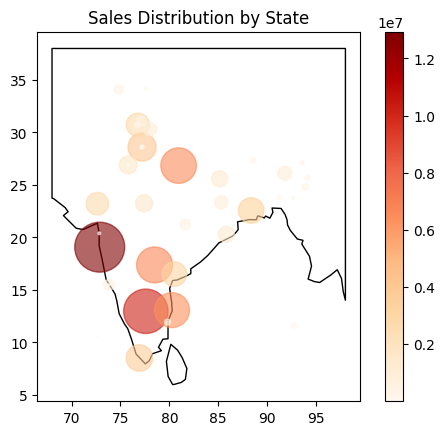

In [31]:
world = gpd.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([68, 6, 98, 38]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, column='Order_total', cmap='OrRd', legend=True, markersize=gdf['Order_total']/10000, alpha=0.6)
plt.title('Sales Distribution by State')

plt.show()

In [32]:
df.head()

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier_status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Promotion,Day,Month,Year,Order_total
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship,True,30,4,2022,406.0
1,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,Amazon,True,30,4,2022,329.0
2,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,Amazon,False,30,4,2022,574.0
3,2022-04-30,Shipped,Amazon,Expedited,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,Amazon,True,30,4,2022,824.0
4,2022-04-30,Shipped,Amazon,Expedited,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,Amazon,True,30,4,2022,653.0


Text(0.5, 1.0, 'Courier Status Distribution')

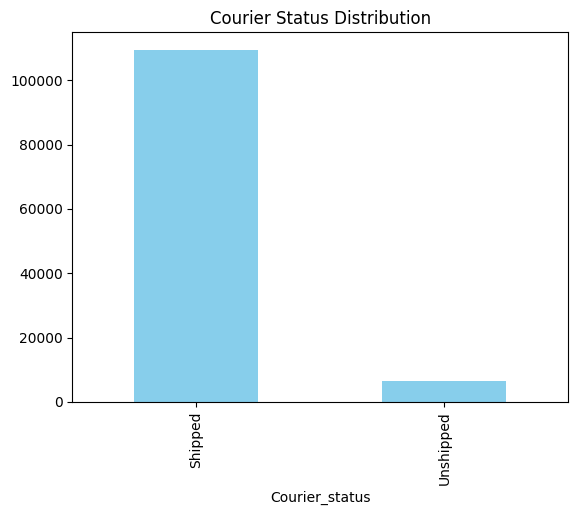

In [34]:
df['Courier_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Courier Status Distribution')

In [35]:
df['Month'].unique()

array([4, 3, 5, 6])

In [40]:
#filterfor last month
orders_last_month = df[df['Month'] >= 6]
orders_last_month

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier_status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Promotion,Day,Month,Year,Order_total
81816,2022-06-29,Pending,Merchant,Standard,Western Dress,XXL,Unshipped,1,735.0,HARIDWAR,UTTARAKHAND,False,Easy Ship,False,29,6,2022,735.0
81817,2022-06-29,Pending,Merchant,Standard,kurta,XS,Unshipped,1,459.0,LONAVALA,MAHARASHTRA,False,Easy Ship,False,29,6,2022,459.0
81818,2022-06-29,Pending,Merchant,Standard,Western Dress,M,Unshipped,1,0.0,MURAKAMBATTU,ANDHRA PRADESH,False,Easy Ship,False,29,6,2022,0.0
81819,2022-06-29,Pending,Amazon,Expedited,Western Dress,S,Unshipped,1,1168.0,Kolkata,WEST BENGAL,False,Amazon,False,29,6,2022,1168.0
81820,2022-06-29,Pending,Amazon,Expedited,Western Dress,XXL,Unshipped,1,735.0,HARIDWAR,UTTARAKHAND,False,Amazon,True,29,6,2022,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115927,2022-06-01,Shipped,Amazon,Expedited,Set,L,Shipped,1,889.0,Chandigarh,CHANDIGARH,False,Amazon,False,1,6,2022,889.0
115928,2022-06-01,Shipped,Amazon,Expedited,kurta,M,Shipped,1,399.0,COIMBATORE,TAMIL NADU,False,Amazon,True,1,6,2022,399.0
115929,2022-06-01,Shipped,Amazon,Expedited,Set,XXL,Shipped,1,771.0,HYDERABAD,TELANGANA,False,Amazon,False,1,6,2022,771.0
115930,2022-06-01,Shipped,Amazon,Expedited,Western Dress,XL,Shipped,1,885.0,Pune,MAHARASHTRA,False,Amazon,True,1,6,2022,885.0


Text(0.5, 1.0, 'Courier Status Distribution')

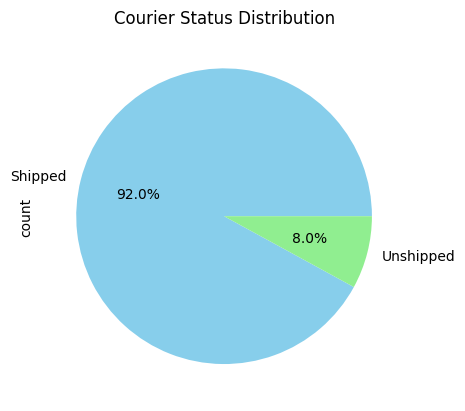

In [43]:
orders_last_month['Courier_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Courier Status Distribution')

In [45]:
# order which are old but have not been shipped
old_orders = df[df['Courier_status'] == 'Unshipped'].sort_values(by='Date', ascending=True)
old_orders.head(20)

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier_status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Promotion,Day,Month,Year,Order_total
43834,2022-03-31,Cancelled,Amazon,Expedited,Set,L,Unshipped,1,698.0,HUBLI,KARNATAKA,False,Amazon,False,31,3,2022,698.0
43907,2022-03-31,Cancelled,Amazon,Expedited,Set,L,Unshipped,1,1112.0,PUNE,MAHARASHTRA,False,Amazon,False,31,3,2022,1112.0
43895,2022-03-31,Cancelled,Amazon,Expedited,Set,L,Unshipped,1,542.0,HYDERABAD,TELANGANA,False,Amazon,False,31,3,2022,542.0
43804,2022-03-31,Cancelled,Amazon,Expedited,Ethnic Dress,L,Unshipped,1,1099.0,NAVI MUMBAI,MAHARASHTRA,False,Amazon,False,31,3,2022,1099.0
42779,2022-04-01,Cancelled,Amazon,Expedited,Top,XL,Unshipped,1,421.0,MUMBAI,MAHARASHTRA,False,Amazon,False,1,4,2022,421.0
42789,2022-04-01,Cancelled,Amazon,Expedited,Set,L,Unshipped,1,657.0,LUCKNOW,UTTAR PRADESH,False,Amazon,False,1,4,2022,657.0
42827,2022-04-01,Cancelled,Amazon,Expedited,Top,M,Unshipped,1,460.0,Pune,MAHARASHTRA,False,Amazon,False,1,4,2022,460.0
42834,2022-04-01,Cancelled,Amazon,Expedited,kurta,XL,Unshipped,1,426.0,VARKALA,KERALA,False,Amazon,False,1,4,2022,426.0
42839,2022-04-01,Cancelled,Amazon,Expedited,Set,M,Unshipped,1,657.0,Pune,MAHARASHTRA,False,Amazon,False,1,4,2022,657.0
42920,2022-04-01,Cancelled,Amazon,Expedited,Set,XS,Unshipped,1,646.0,THANE west,MAHARASHTRA,False,Amazon,False,1,4,2022,646.0


In [50]:
unshipped_status=old_orders.groupby('Status')['Date'].count()
unshipped_status

Status
Cancelled                        5628
Pending                           646
Pending - Waiting for Pick Up     281
Name: Date, dtype: int64

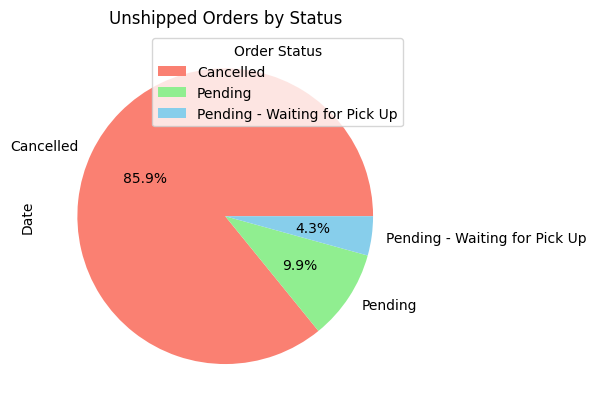

In [56]:
unshipped_status.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'lightgreen', 'skyblue'])
plt.title('Unshipped Orders by Status')
plt.legend(title='Order Status', loc='upper right')
plt.show()


In [57]:
df.head()

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier_status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Promotion,Day,Month,Year,Order_total
0,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship,True,30,4,2022,406.0
1,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,Amazon,True,30,4,2022,329.0
2,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,Amazon,False,30,4,2022,574.0
3,2022-04-30,Shipped,Amazon,Expedited,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,Amazon,True,30,4,2022,824.0
4,2022-04-30,Shipped,Amazon,Expedited,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,Amazon,True,30,4,2022,653.0


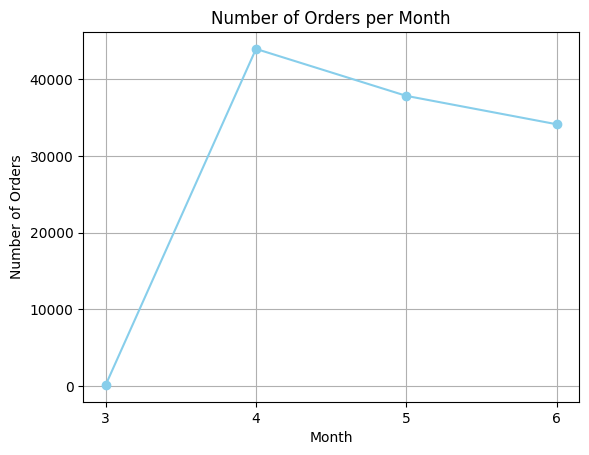

In [63]:
month_group=df.groupby('Month')['Date'].count()
month_group

#plot time series
month_group.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(month_group.index)
plt.grid()

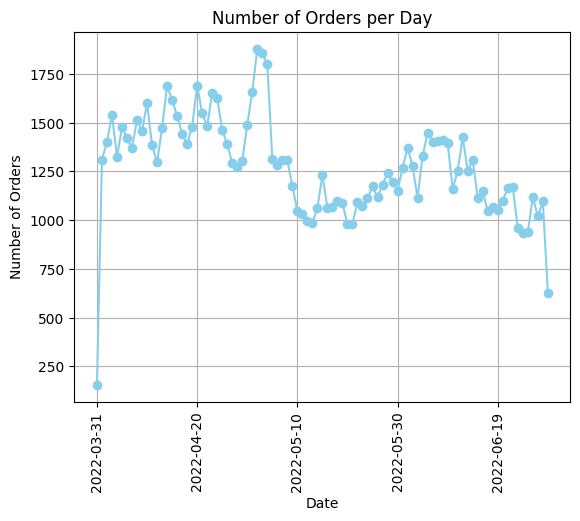

In [67]:
date_group=df.groupby('Date')['Month'].count()
date_group

#plot time series
date_group.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid()
plt.show()




In [68]:
date_group

Date
2022-03-31     156
2022-04-01    1311
2022-04-02    1402
2022-04-03    1540
2022-04-04    1326
              ... 
2022-06-25     939
2022-06-26    1118
2022-06-27    1021
2022-06-28    1097
2022-06-29     626
Name: Month, Length: 91, dtype: int64

In [71]:
date_group.sort_values(ascending=False).head(20)

Date
2022-05-02    1879
2022-05-03    1857
2022-05-04    1802
2022-04-20    1689
2022-04-14    1688
2022-05-01    1657
2022-04-23    1653
2022-04-24    1625
2022-04-15    1616
2022-04-10    1602
2022-04-21    1548
2022-04-03    1540
2022-04-16    1534
2022-04-08    1516
2022-04-30    1489
2022-04-22    1481
2022-04-19    1479
2022-04-05    1476
2022-04-13    1474
2022-04-25    1464
Name: Month, dtype: int64

In [76]:
date_group_data=df.groupby('Category')['Date'].count()
date_group_data

Category
Blouse             837
Bottom             393
Dupatta              3
Ethnic Dress      1050
Saree              148
Set              45079
Top               9864
Western Dress    13893
kurta            44749
Name: Date, dtype: int64

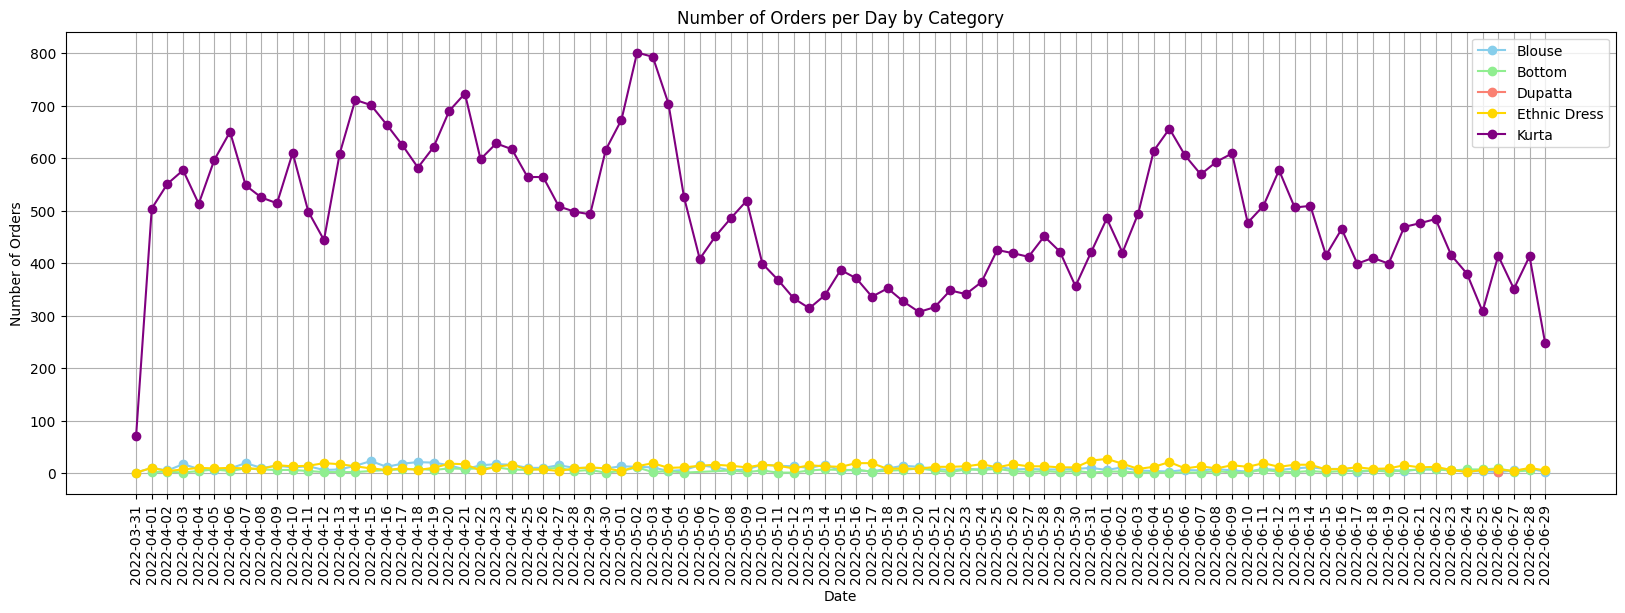

In [81]:
blouse_cat=df[df['Category']=='Blouse']
bottom_cat=df[df['Category']=='Bottom']
dupatta_cat=df[df['Category']=='Dupatta']
ethnic_cat=df[df['Category']=='Ethnic Dress']

kurta_cat=df[df['Category']=='kurta']


date_group_blouse=blouse_cat.groupby('Date')['Month'].count()
date_group_bottom=bottom_cat.groupby('Date')['Month'].count()
date_group_dupatta=dupatta_cat.groupby('Date')['Month'].count()
date_group_ethnic=ethnic_cat.groupby('Date')['Month'].count()
date_group_kurta=kurta_cat.groupby('Date')['Month'].count()

#plot time series
plt.figure(figsize=(20,6))
plt.plot(date_group_blouse.index, date_group_blouse.values, marker='o', label='Blouse',color='skyblue')
plt.plot(date_group_bottom.index, date_group_bottom.values, marker='o', label='Bottom', color='lightgreen')
plt.plot(date_group_dupatta.index, date_group_dupatta.values, marker='o', label='Dupatta', color='salmon')
plt.plot(date_group_ethnic.index, date_group_ethnic.values, marker='o', label='Ethnic Dress', color='gold')
plt.plot(date_group_kurta.index, date_group_kurta.values, marker='o', label='Kurta', color='purple')
plt.title('Number of Orders per Day by Category')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()


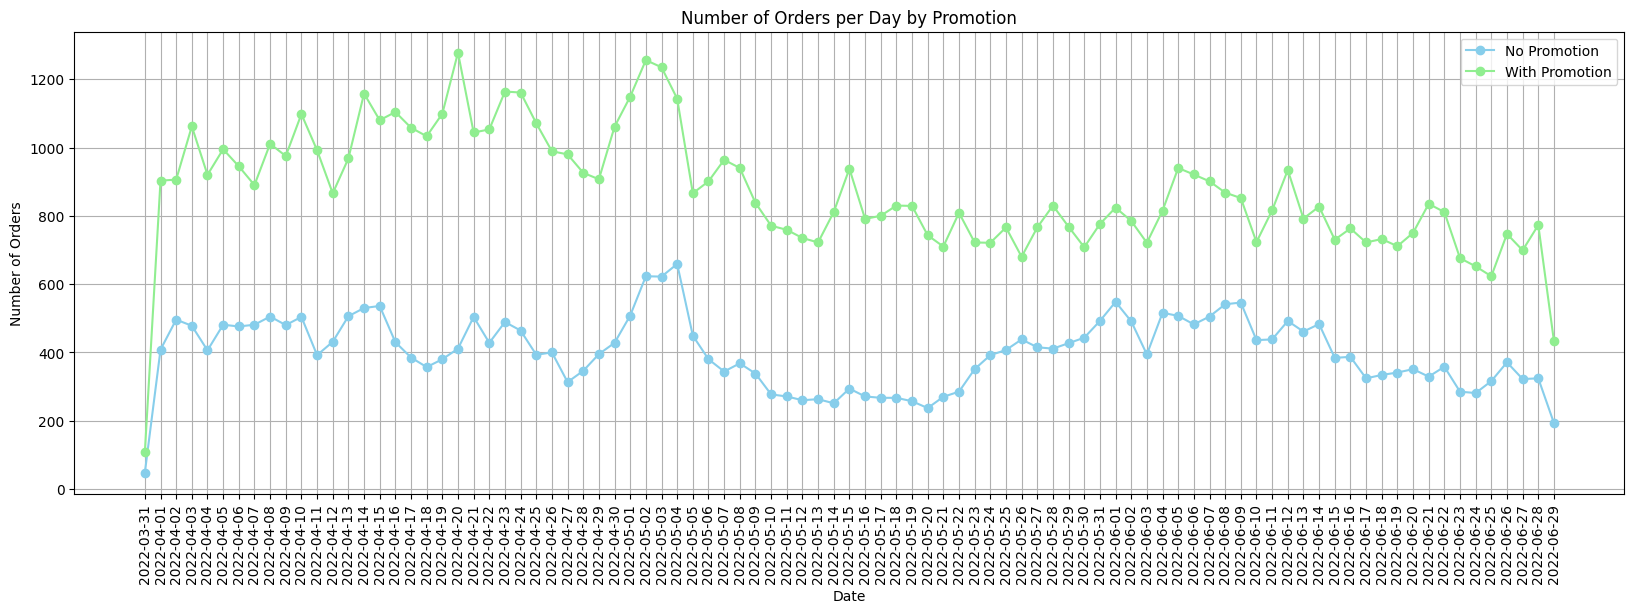

In [82]:
no_promo=df[df['Promotion']==False]
yes_promo=df[df['Promotion']==True]
no_promo_group=no_promo.groupby('Date')['Month'].count()
yes_promo_group=yes_promo.groupby('Date')['Month'].count()

#plot time series
plt.figure(figsize=(20,6))
plt.plot(no_promo_group.index, no_promo_group.values, marker='o', label='No Promotion',color='skyblue')
plt.plot(yes_promo_group.index, yes_promo_group.values, marker='o', label='With Promotion', color='lightgreen')
plt.title('Number of Orders per Day by Promotion')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

In [84]:
cat_group_data=df.groupby('Category')['Qty'].sum()
cat_group_data

Category
Blouse             844
Bottom             397
Dupatta              3
Ethnic Dress      1053
Saree              152
Set              45214
Top               9897
Western Dress    13938
kurta            44956
Name: Qty, dtype: int64

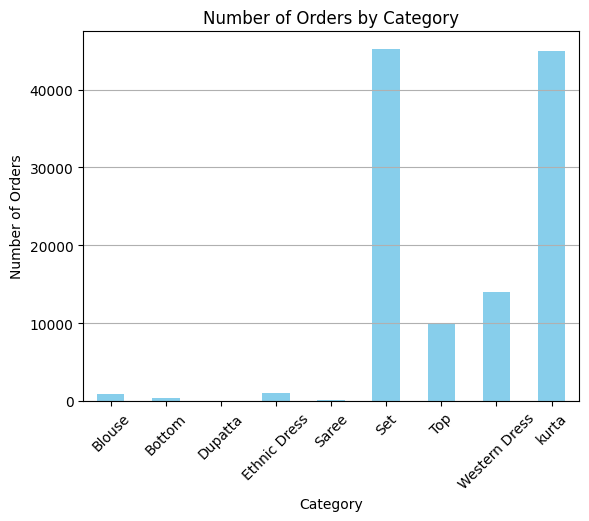

In [ ]:
cat_group_data.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

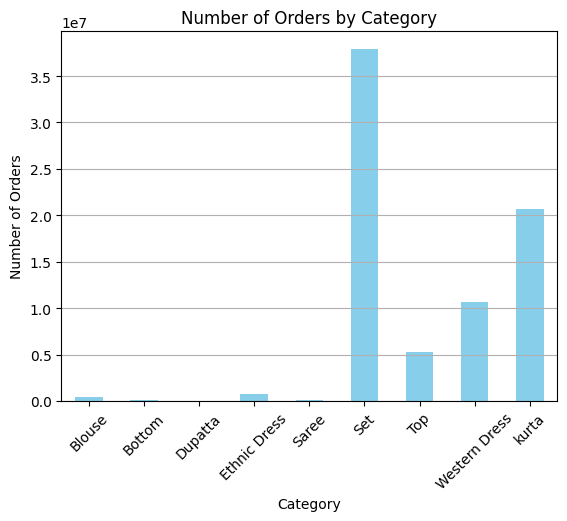

In [86]:
cat_group_data=df.groupby('Category')['Order_total'].sum()
cat_group_data

cat_group_data.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()